# Student Grant Recommendation

In [4]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
np.random.randn(2,3)

array([[ 1.23029068,  1.20237985, -0.38732682],
       [-0.30230275, -1.04855297, -1.42001794]])

In [55]:
np.random.seed(0)
np.random.randn(2,3)

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788]])

In [2]:
# 1. Data Retrieval

df = pd.read_csv("datasets_n_images/datasets_module_1/student_records.csv")
df

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend
0,Henry,A,Y,90,85,Yes
1,John,C,N,85,51,Yes
2,David,F,N,10,17,No
3,Holmes,B,Y,75,71,No
4,Marvin,E,N,20,30,No
5,Simon,A,Y,92,79,Yes
6,Robert,B,Y,60,59,No
7,Trent,C,Y,75,33,No


In [6]:
pd.get_dummies(df['Obedient'])

,N,Y
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
5,0,1
6,0,1
7,0,1


In [3]:
df.corr()

,ResearchScore,ProjectScore
ResearchScore,1.0000,0.8078
ProjectScore,0.8078,1.0000


<AxesSubplot:>

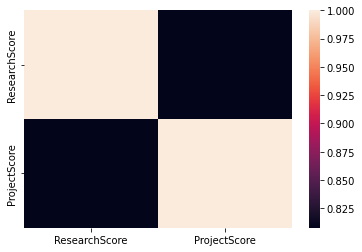

In [4]:
sns.heatmap(df.corr())

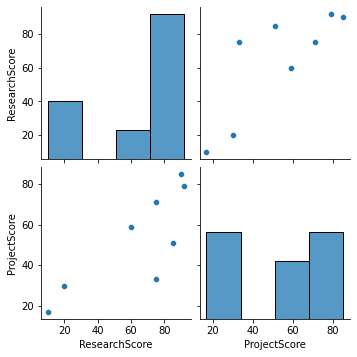

In [6]:
sns.pairplot(df)

In [8]:
df.isnull().sum()

Name             0
OverallGrade     0
Obedient         0
ResearchScore    0
ProjectScore     0
Recommend        0
dtype: int64

In [9]:
# 3. Feature Extraction and Engineering

features_names = ['OverallGrade','Obedient','ResearchScore','ProjectScore']
training_features = df[features_names]
training_features

,OverallGrade,Obedient,ResearchScore,ProjectScore
0,A,Y,90,85
1,C,N,85,51
2,F,N,10,17
3,B,Y,75,71
4,E,N,20,30
5,A,Y,92,79
6,B,Y,60,59
7,C,Y,75,33


In [10]:
outcome_name = ['Recommend']
outcome_labels = df[outcome_name]
outcome_labels

,Recommend
0,Yes
1,Yes
2,No
3,No
4,No
5,Yes
6,No
7,No


In [11]:
training_features

,OverallGrade,Obedient,ResearchScore,ProjectScore
0,A,Y,90,85
1,C,N,85,51
2,F,N,10,17
3,B,Y,75,71
4,E,N,20,30
5,A,Y,92,79
6,B,Y,60,59
7,C,Y,75,33


In [12]:
numeric_feature_names = ['ResearchScore','ProjectScore']
categorical_feature_names = ['OverallGrade','Obedient']

In [13]:
training_features[numeric_feature_names]

,ResearchScore,ProjectScore
0,90,85
1,85,51
2,10,17
3,75,71
4,20,30
5,92,79
6,60,59
7,75,33


In [14]:
from sklearn.preprocessing import StandardScaler

# z= x-mean/ SD

ss = StandardScaler()

# ss, now u go and study these numeric columns --> i.e. fit() over it
ss.fit(training_features[numeric_feature_names])

# ss, now appear for the test
training_features[numeric_feature_names] = ss.transform(training_features[numeric_feature_names])
training_features

,OverallGrade,Obedient,ResearchScore,ProjectScore
0,A,Y,0.899583,1.376650
1,C,N,0.730648,-0.091777
2,F,N,-1.803390,-1.560203
3,B,Y,0.392776,0.772004
4,E,N,-1.465519,-0.998746
5,A,Y,0.967158,1.117516
6,B,Y,-0.114032,0.253735
7,C,Y,0.392776,-0.869179


In [15]:
# Engineering Categorical features

training_features = pd.get_dummies(training_features, columns=categorical_feature_names)
training_features

,ResearchScore,ProjectScore,OverallGrade_A,OverallGrade_B,OverallGrade_C,OverallGrade_E,OverallGrade_F,Obedient_N,Obedient_Y
0,0.899583,1.376650,1,0,0,0,0,0,1
1,0.730648,-0.091777,0,0,1,0,0,1,0
2,-1.803390,-1.560203,0,0,0,0,1,1,0
3,0.392776,0.772004,0,1,0,0,0,0,1
4,-1.465519,-0.998746,0,0,0,1,0,1,0
5,0.967158,1.117516,1,0,0,0,0,0,1
6,-0.114032,0.253735,0,1,0,0,0,0,1
7,0.392776,-0.869179,0,0,1,0,0,0,1


In [16]:
training_features.columns

Index(['ResearchScore', 'ProjectScore', 'OverallGrade_A', 'OverallGrade_B',
       'OverallGrade_C', 'OverallGrade_E', 'OverallGrade_F', 'Obedient_N',
       'Obedient_Y'],
      dtype='object')

In [17]:
numeric_feature_names

['ResearchScore', 'ProjectScore']

In [18]:
list(set(training_features.columns) - set(numeric_feature_names))

['OverallGrade_A',
 'Obedient_N',
 'OverallGrade_E',
 'OverallGrade_B',
 'OverallGrade_C',
 'OverallGrade_F',
 'Obedient_Y']

In [19]:
categorical_engineered_features = list(set(training_features.columns) - set(numeric_feature_names))
categorical_engineered_features

['OverallGrade_A',
 'Obedient_N',
 'OverallGrade_E',
 'OverallGrade_B',
 'OverallGrade_C',
 'OverallGrade_F',
 'Obedient_Y']

In [20]:
training_features

,ResearchScore,ProjectScore,OverallGrade_A,OverallGrade_B,OverallGrade_C,OverallGrade_E,OverallGrade_F,Obedient_N,Obedient_Y
0,0.899583,1.376650,1,0,0,0,0,0,1
1,0.730648,-0.091777,0,0,1,0,0,1,0
2,-1.803390,-1.560203,0,0,0,0,1,1,0
3,0.392776,0.772004,0,1,0,0,0,0,1
4,-1.465519,-0.998746,0,0,0,1,0,1,0
5,0.967158,1.117516,1,0,0,0,0,0,1
6,-0.114032,0.253735,0,1,0,0,0,0,1
7,0.392776,-0.869179,0,0,1,0,0,0,1


In [21]:
outcome_labels

,Recommend
0,Yes
1,Yes
2,No
3,No
4,No
5,Yes
6,No
7,No


In [22]:
outcome_labels.shape

(8, 1)

In [23]:
np.array(outcome_labels['Recommend'])

array(['Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No'], dtype=object)

In [24]:
y = (np.array(outcome_labels['Recommend']))
y

array(['Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No'], dtype=object)

In [25]:
y.shape

(8,)

In [26]:
#70:30, 80:20, 75:25

In [27]:
# TTS

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_features, y, test_size=0.2, random_state=0)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6, 9), (2, 9), (6,), (2,))

In [30]:
# 4. Modeling

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

model = lr.fit(X_train, y_train )

In [31]:
print(model)

LogisticRegression()


In [32]:
model.predict(X_test)

array(['No', 'No'], dtype=object)

In [33]:
y_test

array(['No', 'No'], dtype=object)

In [81]:
# 5. Model Evaluation

pred_labels = model.predict(training_features)

actual_labels = np.array(outcome_labels['Recommend'])

print(pred_labels)
print()
print(actual_labels)

['Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No']

['Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No']


In [82]:
model.predict([[0.899583,1.376650,1,0,0,0,0,0,1]])

array(['Yes'], dtype=object)

In [83]:
model.predict([[0.5,0.5,1,0,0,0,0,0,1]])

array(['Yes'], dtype=object)

In [84]:
model.predict([[0.5,0.5,1,0,0,0,0,1,0]])

array(['Yes'], dtype=object)

In [85]:
model.predict([[0.5,0.5,0,0,0,0,1,0,1]])

array(['No'], dtype=object)

In [86]:
print(pred_labels,"\n\n",actual_labels)

['Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No'] 

 ['Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No']


In [87]:
# Performance of the model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:\n")
accuracy_score(actual_labels,pred_labels)

Accuracy:



1.0

In [88]:
print("Confusion Matrix:\n")
confusion_matrix(actual_labels,pred_labels)

Confusion Matrix:



array([[5, 0],
       [0, 3]], dtype=int64)

In [89]:
print("Classification Report:\n")
print(classification_report(actual_labels,pred_labels))

Classification Report:

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         5
         Yes       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [33]:
# Model Deployment

import joblib
import os

if not os.path.exists('Model'):
    os.mkdir("Model")
if not os.path.exists('Scaler'):
    os.mkdir("Scaler")
    
joblib.dump(model,r"Model/cliet_model.pickle")
joblib.dump(ss,r"Scaler/client_ss.pickle")

['Scaler/client_ss.pickle']

# Happy Learning

In [34]:
raj_model = joblib.load(r"Model/cliet_model.pickle")
raj_ss = joblib.load(r"Scaler/client_ss.pickle")

In [35]:
# Create records for testing

new_data = pd.DataFrame([
    { 'Name':'Ninad','OverallGrade':'F','Obedient':'N','ResearchScore':30,'ProjectScore':20 },
    { 'Name':'Thomas','OverallGrade':'A','Obedient':'Y','ResearchScore':78,'ProjectScore':80 }
])
new_data

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore
0,Ninad,F,N,30,20
1,Thomas,A,Y,78,80


In [36]:
# Data Preparation
prediction_features = new_data[features_names]
prediction_features

,OverallGrade,Obedient,ResearchScore,ProjectScore
0,F,N,30,20
1,A,Y,78,80


In [38]:
prediction_features[numeric_feature_names]

,ResearchScore,ProjectScore
0,30,20
1,78,80


In [39]:
prediction_features[categorical_feature_names]

,OverallGrade,Obedient
0,F,N
1,A,Y


In [40]:
prediction_features[numeric_feature_names] = raj_ss.transform(prediction_features[numeric_feature_names])
prediction_features

,OverallGrade,Obedient,ResearchScore,ProjectScore
0,F,N,-1.127647,-1.430636
1,A,Y,0.494137,1.160705


In [41]:
prediction_features = pd.get_dummies(prediction_features, columns=categorical_feature_names)
prediction_features

,ResearchScore,ProjectScore,OverallGrade_A,OverallGrade_F,Obedient_N,Obedient_Y
0,-1.127647,-1.430636,0,1,1,0
1,0.494137,1.160705,1,0,0,1


In [42]:
dd = prediction_features.copy()
dd

,ResearchScore,ProjectScore,OverallGrade_A,OverallGrade_F,Obedient_N,Obedient_Y
0,-1.127647,-1.430636,0,1,1,0
1,0.494137,1.160705,1,0,0,1


In [43]:
dd['OverallGrade_B'] = np.array([0,0])
dd

,ResearchScore,ProjectScore,OverallGrade_A,OverallGrade_F,Obedient_N,Obedient_Y,OverallGrade_B
0,-1.127647,-1.430636,0,1,1,0,0
1,0.494137,1.160705,1,0,0,1,0


In [44]:
dd['OverallGrade_C'] = np.array([0,0])
dd

,ResearchScore,ProjectScore,OverallGrade_A,OverallGrade_F,Obedient_N,Obedient_Y,OverallGrade_B,OverallGrade_C
0,-1.127647,-1.430636,0,1,1,0,0,0
1,0.494137,1.160705,1,0,0,1,0,0


In [45]:
dd['OverallGrade_E'] = np.array([0,0])
dd

,ResearchScore,ProjectScore,OverallGrade_A,OverallGrade_F,Obedient_N,Obedient_Y,OverallGrade_B,OverallGrade_C,OverallGrade_E
0,-1.127647,-1.430636,0,1,1,0,0,0,0
1,0.494137,1.160705,1,0,0,1,0,0,0


In [46]:
raj_model.predict(dd)

array(['No', 'Yes'], dtype=object)

In [48]:
categorical_engineered_features

['Obedient_Y',
 'OverallGrade_F',
 'Obedient_N',
 'OverallGrade_B',
 'OverallGrade_E',
 'OverallGrade_A',
 'OverallGrade_C']

In [47]:
prediction_features

,ResearchScore,ProjectScore,OverallGrade_A,OverallGrade_F,Obedient_N,Obedient_Y
0,-1.127647,-1.430636,0,1,1,0
1,0.494137,1.160705,1,0,0,1


In [49]:
prediction_features.columns

Index(['ResearchScore', 'ProjectScore', 'OverallGrade_A', 'OverallGrade_F',
       'Obedient_N', 'Obedient_Y'],
      dtype='object')

In [50]:
numeric_feature_names

['ResearchScore', 'ProjectScore']

In [51]:
current_categorical_engineered_features = set(prediction_features.columns) - set(numeric_feature_names)
current_categorical_engineered_features

{'Obedient_N', 'Obedient_Y', 'OverallGrade_A', 'OverallGrade_F'}

In [52]:
categorical_engineered_features

['Obedient_Y',
 'OverallGrade_F',
 'Obedient_N',
 'OverallGrade_B',
 'OverallGrade_E',
 'OverallGrade_A',
 'OverallGrade_C']

In [53]:
missing_features = set(categorical_engineered_features) - set(current_categorical_engineered_features)
missing_features

{'OverallGrade_B', 'OverallGrade_C', 'OverallGrade_E'}

In [54]:
prediction_features

,ResearchScore,ProjectScore,OverallGrade_A,OverallGrade_F,Obedient_N,Obedient_Y
0,-1.127647,-1.430636,0,1,1,0
1,0.494137,1.160705,1,0,0,1


In [55]:
len(prediction_features)

2

In [56]:
for feature in missing_features:
    prediction_features[feature] = 0 * len(prediction_features)
prediction_features

,ResearchScore,ProjectScore,OverallGrade_A,OverallGrade_F,Obedient_N,Obedient_Y,OverallGrade_B,OverallGrade_E,OverallGrade_C
0,-1.127647,-1.430636,0,1,1,0,0,0,0
1,0.494137,1.160705,1,0,0,1,0,0,0


In [58]:
predictions = raj_model.predict(prediction_features)
predictions

array(['No', 'Yes'], dtype=object)

In [59]:
new_data

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore
0,Ninad,F,N,30,20
1,Thomas,A,Y,78,80


In [60]:
new_data['Recommend'] = predictions
new_data

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend
0,Ninad,F,N,30,20,No
1,Thomas,A,Y,78,80,Yes


# Happy Learning

In [ ]:
1. Loading Dataset
2. Check for any null values or not 
3. finding out if there's any correlation b/w feature pairs
4. Transforming categorical values into numerical 
5. Standardize numerical values     
6. Split the data into train and test (80:20, 75:25, 70:30 )

 <<<<<<< Dimensionality Reduction >>>>>>>>>
7. Load the model and train
8. Predict through the trained model
9. find the relevance of the model using different metrics as per the algorithm 

In [ ]:
sq. ft area
number of rooms
location of the house
park nearby or not 
total number of bricks
how many days it toook to built the house
.
.
.
.
.
.

M -> N

m >> N    10-> 5, 20->15